# Delivery Duration Prediction  

This is a machine learning project made with Doordash data. It is possible to find it at the following link.

Link: https://platform.stratascratch.com/data-projects/delivery-duration-prediction

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore')

# Importing Data

In [2]:
dd = pd.read_csv('./datasets/datasets/historical_data.csv', parse_dates=['created_at', 'actual_delivery_time'])
dd

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


# EDA and Feature Engineering

In [3]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [4]:
dd.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

Visualizing missing data.

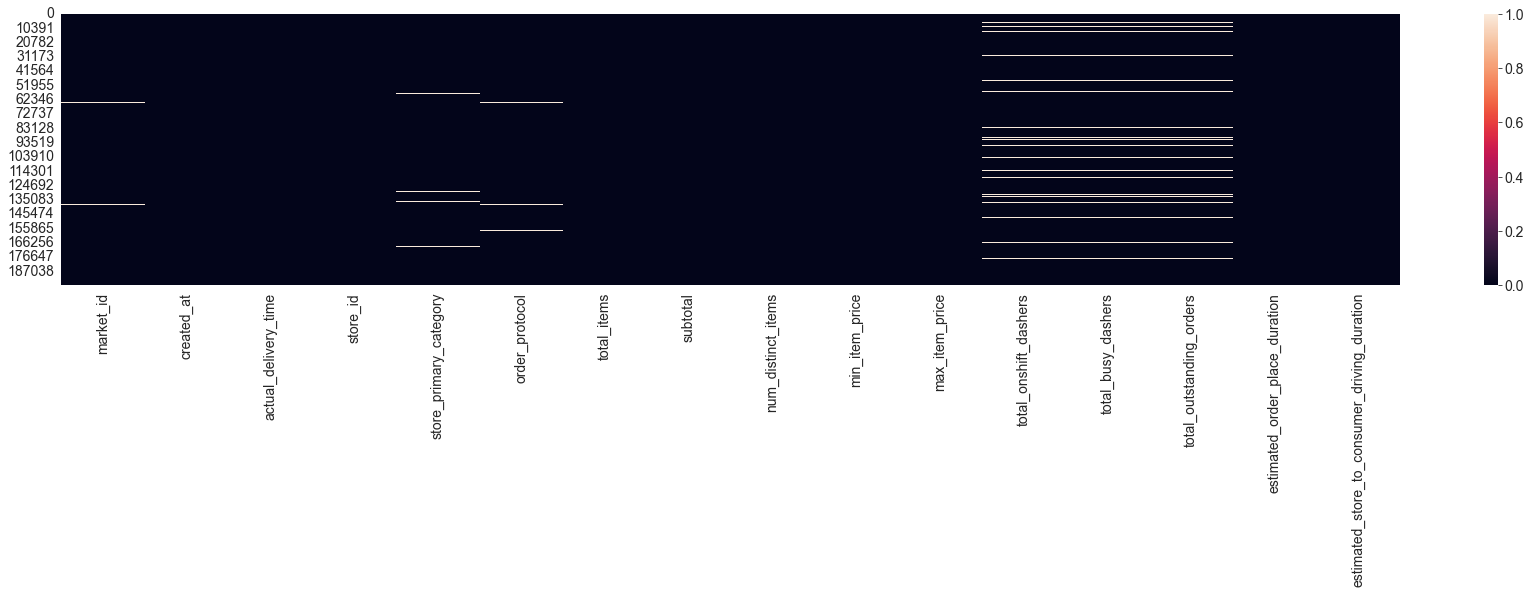

In [5]:
plt.figure(figsize=(30,5))
sns.heatmap(dd.isna())
plt.xticks(rotation=90);

Since there are only seven missing values for one of the feature that will compose the target, it is possible to drop them.

In [6]:
obs_to_remove = dd[dd.actual_delivery_time.isna()].index
dd.drop(index=obs_to_remove, inplace=True)

In [7]:
dd.actual_delivery_time.isna().sum()

0

## Creating the target column.

In [8]:
dd['Target'] = (dd.actual_delivery_time - dd.created_at).dt.seconds
dd.Target

0         3779
1         4024
2         1781
3         3075
4         2390
          ... 
197423    3907
197424    3383
197425    3008
197426    3907
197427    2228
Name: Target, Length: 197421, dtype: int64

## Replacing Missing Values

Columns with missing values:  

- market_id  
- store_primary_category  
- order protocol  
- total_onshift_dashers                           
- total_busy_dashers                              
- total_outstanding_orders  
- estimated_store_to_consumer_driving_duration                    

### Market ID

In [9]:
dd.market_id.value_counts()

2.0    55055
4.0    47597
1.0    38037
3.0    23296
5.0    17999
6.0    14450
Name: market_id, dtype: int64

ID 2.0 seems to be the most popular one, since there are not many information regarding the geographical position a possible solution is to replace the null values with 2.0

In [10]:
dd.market_id.fillna(2.0, inplace=True)
print('Null values: {}'.format(dd.market_id.isna().sum()))
dd.market_id.value_counts()

Null values: 0


2.0    56042
4.0    47597
1.0    38037
3.0    23296
5.0    17999
6.0    14450
Name: market_id, dtype: int64

### Store primary category

In [11]:
dd.store_primary_category.isna().sum()

4760

The missing values in the store primary category can be replaced by using the store_id feature.

In [12]:
unique_id = dd.store_id.unique().tolist()
new_df = pd.DataFrame()

for x in unique_id:
    try:
        pop = dd[dd.store_id == x]['store_primary_category'].mode()[0]
        store_df = dd[dd.store_id == x]['store_primary_category'].fillna(pop)
        new_df = pd.concat([new_df, store_df])
    except:
        df_to_concat = dd[dd.store_id == x]['store_primary_category']
        new_df = pd.concat([new_df, df_to_concat])

In [13]:
new_df

,0
0,american
1,mexican
2,indian
3,indian
4,indian
...,...
197423,fast
197424,fast
197425,fast
197426,sandwich


In [14]:
new_df[0].isna().sum()

867

In [15]:
dd['store_primary_category'] = new_df[0]
dd.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Target
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,indian,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,indian,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,indian,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390


The number of missing values dropped from 4760 to 867, in order to replace the remaining ones it could be adopted the same process but using the location feature.

In [16]:
market_dict = {}

In [17]:
def market_sub(id):
    popular = dd[dd.market_id == id]['store_primary_category'].mode()[0]
    market_dict[id] = popular 

In [18]:
market_id_unique = dd.market_id.unique().tolist()

In [19]:
[market_sub(id) for id in market_id_unique]
market_dict

{1.0: 'american',
 2.0: 'mexican',
 3.0: 'american',
 4.0: 'pizza',
 5.0: 'american',
 6.0: 'pizza'}

In [20]:
# Creating a dataframe with the null values
null_primary_df = dd[dd.store_primary_category.isna()]

# Replacing them
null_primary_df['store_primary_category'] = null_primary_df.market_id.map(market_dict)

In [21]:
# Dropping null indexes
null_indexes = null_primary_df.index 
dd.drop(index=null_indexes, inplace=True)

# Concatenating 
dd = pd.concat([dd, null_primary_df])

In [22]:
dd.store_primary_category.isna().sum()

0

All the null values have been replaced.  

Let's see what are the remaining ones.

In [23]:
dd.isna().sum()

market_id                                           0
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                              0
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
Target                                              0
dtype: int64

### Order protocol  

It can be done the same work done previously, maybe certain restaurants have a more popular order protocol.

In [24]:
dd.order_protocol.value_counts()

1.0    54723
3.0    53197
5.0    44289
2.0    24051
4.0    19353
6.0      794
7.0       19
Name: order_protocol, dtype: int64

In [25]:
# Creating an empty df
order_p_df = pd.DataFrame()

# Replacing values
for x in unique_id:
    try:
        most_popular = dd[dd.store_id == x]['order_protocol'].mode()[0]
        rep_df = dd[dd.store_id == x]['order_protocol'].fillna(most_popular)
        order_p_df = pd.concat([order_p_df, rep_df])
    except:
        null_protocol = dd[dd.store_id == x]['order_protocol']
        order_p_df = pd.concat([order_p_df, null_protocol])

In [26]:
order_p_df[0]

0         1.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
197423    4.0
197424    4.0
197425    4.0
197426    1.0
197427    1.0
Name: 0, Length: 197421, dtype: float64

In [27]:
dd['order_protocol'] = order_p_df[0]
dd.order_protocol.isna().sum()

3

Only three null values remains, they could be substituted with the most common order protocol for that food.

In [28]:
# Finding the remaining stores with null order protocol
null_stores = dd[dd.order_protocol.isna()]['store_id'].unique().tolist()

# Creating an empty df
remaining_null = pd.DataFrame()

# Substituting

for x in null_stores:
    food_category = dd[dd.store_id==x]['store_primary_category'].mode()[0]
    order_protocol_for_food = dd[dd.store_primary_category == food_category]['order_protocol'].mode()[0]
    sub_df = dd[dd.store_id == x]['order_protocol'].fillna(order_protocol_for_food)
    remaining_null = pd.concat([remaining_null, sub_df])

In [29]:
dd[dd.order_protocol.isna()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Target
152850,2.0,2015-02-08 23:43:19,2015-02-09 00:33:20,4122,pizza,NaN,2,3400,2,1000,1400,3.0,3.0,3.0,446,586.0,3001
186154,2.0,2015-02-15 23:53:45,2015-02-16 00:25:42,5774,sandwich,NaN,3,1550,2,250,900,14.0,14.0,18.0,446,261.0,1917
120923,2.0,2015-02-08 03:39:46,2015-02-08 04:25:31,3258,mexican,NaN,3,3470,3,725,1795,NaN,NaN,NaN,446,395.0,2745


In [30]:
# Null order protocol 
null_order_protocol = dd[dd.order_protocol.isna()]

# Substituting
null_order_protocol['order_protocol'] = remaining_null[0]

# Null values indexes to drop 
drop_index = dd[dd.order_protocol.isna()].index 

# Dropping
dd.drop(index=drop_index, inplace=True)

# Adding the new values
dd = pd.concat([dd, null_order_protocol])

# Checking the result
dd.order_protocol.isna().sum()

0

In [31]:
dd.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Target
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,indian,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,indian,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,indian,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390


In [32]:
dd.isna().sum()

market_id                                           0
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                              0
order_protocol                                      0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
Target                                              0
dtype: int64

### Total busy dashers  

Replacing with the average value of the store, else, with the average vvalue of the market.

In [33]:
def dash_and_orders(column):
    df_to_append = pd.DataFrame()
    try:
        for x in unique_id:
            avg = dd[dd.store_id == x][column].mean()
            df_remove_null = dd[dd.store_id == x][column].fillna(avg)
            df_to_append = pd.concat([df_to_append, df_remove_null])
    except:
        df_with_null = dd[dd.store_id==x][column]
        df_to_append = pd.concat([df_to_append, df_with_null])
    return df_to_append 

In [34]:
# Total busy dashers
busy_dashers = dash_and_orders('total_busy_dashers')
busy_dashers

,0
0,14.0
1,2.0
2,0.0
3,1.0
4,6.0
...,...
197423,17.0
197424,11.0
197425,41.0
197426,7.0


In [35]:
dd['total_busy_dashers'] = busy_dashers[0]
dd.total_busy_dashers.isna().sum()

16130

Now, it is possible to use the average of the market id.

In [36]:
avg_mkt_dict = {}

In [37]:
def avg_mkt(id):
    avg = round(dd[dd.market_id == id]['total_busy_dashers'].mean())
    avg_mkt_dict[id] = avg

In [38]:
[avg_mkt(id) for id in market_id_unique]
avg_mkt_dict

{1.0: 23, 2.0: 57, 3.0: 17, 4.0: 57, 5.0: 20, 6.0: 42}

In [39]:
# Creating a dataframe with null values
df_to_add = dd[dd.total_busy_dashers.isna()]

# Finding indexes to drop
indexes_to_remove = dd[dd.total_busy_dashers.isna()].index 

# Substituting values
df_to_add['total_busy_dashers'] = df_to_add.market_id.map(avg_mkt_dict)

# Removing values
dd.drop(index=indexes_to_remove, inplace=True) 

# Adding the new ones
dd = pd.concat([dd, df_to_add])

# Checking the result
dd.total_busy_dashers.isna().sum()

0

In [40]:
dd.isna().sum()

market_id                                           0
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                              0
order_protocol                                      0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                                  0
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
Target                                              0
dtype: int64

### Total onshift dashers

In [41]:
onshift_dashers = dash_and_orders('total_onshift_dashers')
onshift_dashers

,0
0,33.0
1,1.0
2,1.0
3,1.0
4,6.0
...,...
197423,17.0
197424,12.0
197425,39.0
197426,7.0


In [42]:
dd['total_onshift_dashers'] = onshift_dashers[0]

In [43]:
onshift_dict = {}

In [44]:
def avg_mkt(id, column):
    avg = round(dd[dd.market_id == id][column].mean())
    onshift_dict[id] = avg

In [45]:
[avg_mkt(id, 'total_onshift_dashers') for id in market_id_unique]
onshift_dict

{1.0: 24, 2.0: 62, 3.0: 19, 4.0: 60, 5.0: 24, 6.0: 45}

In [46]:
# Creating a dataframe with null values
df_to_add = dd[dd.total_onshift_dashers.isna()]

# Finding indexes to drop
indexes_to_remove = dd[dd.total_onshift_dashers.isna()].index 

# Substituting values
df_to_add['total_onshift_dashers'] = df_to_add.market_id.map(onshift_dict)

# Removing values
dd.drop(index=indexes_to_remove, inplace=True) 

# Adding the new ones
dd = pd.concat([dd, df_to_add])

# Checking the result
dd.total_onshift_dashers.isna().sum()

0

In [47]:
dd.isna().sum()

market_id                                           0
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                              0
order_protocol                                      0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                               0
total_busy_dashers                                  0
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
Target                                              0
dtype: int64

### Total outstanding orders

In [48]:
outstanding_orders = dash_and_orders('total_outstanding_orders')
outstanding_orders

,0
0,21.0
1,2.0
2,0.0
3,2.0
4,9.0
...,...
197423,23.0
197424,14.0
197425,40.0
197426,12.0


In [49]:
dd['total_outstanding_orders'] = outstanding_orders[0]

In [50]:
outstanding_dict = {}

In [51]:
def avg_mkt(id, column):
    avg = round(dd[dd.market_id == id][column].mean())
    outstanding_dict[id] = avg

In [52]:
[avg_mkt(id, 'total_outstanding_orders') for id in market_id_unique]
outstanding_dict

{1.0: 30, 2.0: 82, 3.0: 20, 4.0: 82, 5.0: 26, 6.0: 58}

In [53]:
# Creating a dataframe with null values
df_to_add = dd[dd.total_outstanding_orders.isna()]

# Finding indexes to drop
indexes_to_remove = dd[dd.total_outstanding_orders.isna()].index 

# Substituting values
df_to_add['total_outstanding_orders'] = df_to_add.market_id.map(outstanding_dict)

# Removing values
dd.drop(index=indexes_to_remove, inplace=True) 

# Adding the new ones
dd = pd.concat([dd, df_to_add])

# Checking the result
dd.total_outstanding_orders.isna().sum()

0

In [54]:
dd.isna().sum()

market_id                                         0
created_at                                        0
actual_delivery_time                              0
store_id                                          0
store_primary_category                            0
order_protocol                                    0
total_items                                       0
subtotal                                          0
num_distinct_items                                0
min_item_price                                    0
max_item_price                                    0
total_onshift_dashers                             0
total_busy_dashers                                0
total_outstanding_orders                          0
estimated_order_place_duration                    0
estimated_store_to_consumer_driving_duration    526
Target                                            0
dtype: int64

### Estimated store to consumer driving duration

In [55]:
duration = dash_and_orders('estimated_store_to_consumer_driving_duration')
duration

,0
0,861.0
1,690.0
2,690.0
3,289.0
4,650.0
...,...
197423,331.0
197424,915.0
197425,795.0
197426,384.0


In [56]:
dd['estimated_store_to_consumer_driving_duration'] = duration[0]

In [57]:
duration_dict = {}

In [58]:
def avg_mkt(id, column):
    avg = round(dd[dd.market_id == id][column].mean())
    duration_dict[id] = avg

In [59]:
[avg_mkt(id, 'estimated_store_to_consumer_driving_duration') for id in market_id_unique]
duration_dict

{1.0: 520, 2.0: 565, 3.0: 542, 4.0: 547, 5.0: 546, 6.0: 535}

In [60]:
# Creating a dataframe with null values
df_to_add = dd[dd.estimated_store_to_consumer_driving_duration.isna()]

# Finding indexes to drop
indexes_to_remove = dd[dd.estimated_store_to_consumer_driving_duration.isna()].index 

# Substituting values
df_to_add['estimated_store_to_consumer_driving_duration'] = df_to_add.market_id.map(duration_dict)

# Removing values
dd.drop(index=indexes_to_remove, inplace=True) 

# Adding the new ones
dd = pd.concat([dd, df_to_add])

# Checking the result
dd.estimated_store_to_consumer_driving_duration.isna().sum()

0

In [61]:
dd.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
Target                                          0
dtype: int64

All the null values have been removed.

Saving the new dataframe in a separate csv file.

In [62]:
#dd.to_csv('dd_no_null.csv', index=None)

# Defining Inputs and Target

In [49]:
dd = pd.read_csv('./dd_no_null.csv', parse_dates=['created_at'])

In [50]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197421 entries, 0 to 197420
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     197421 non-null  float64       
 1   created_at                                    197421 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  object        
 3   store_id                                      197421 non-null  int64         
 4   store_primary_category                        197421 non-null  object        
 5   order_protocol                                197421 non-null  float64       
 6   total_items                                   197421 non-null  int64         
 7   subtotal                                      197421 non-null  int64         
 8   num_distinct_items                            197421 n

Some columns can be dropped:  
- actual_delivery_time  
- store_id 
- store_primary_category  

In [51]:
X = dd.drop(columns=['actual_delivery_time', 'store_id', 'Target'])
y = dd.Target

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197421 entries, 0 to 197420
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     197421 non-null  float64       
 1   created_at                                    197421 non-null  datetime64[ns]
 2   store_primary_category                        197421 non-null  object        
 3   order_protocol                                197421 non-null  float64       
 4   total_items                                   197421 non-null  int64         
 5   subtotal                                      197421 non-null  int64         
 6   num_distinct_items                            197421 non-null  int64         
 7   min_item_price                                197421 non-null  int64         
 8   max_item_price                                197421 n

# Feature Engineering on X

## New columns related to the creation's date

In [53]:
X.head(1)

,market_id,created_at,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0


In [54]:
X['year'] = X.created_at.dt.year 
X['month'] = X.created_at.dt.month 
X['day_of_week'] = X.created_at.dt.day_of_week 
X['hour'] = X.created_at.dt.hour 
X['minutes'] = X.created_at.dt.minute  
X['day_of_year'] = X.created_at.dt.day_of_year

Now it is possible to drop the 'created_at' feature.

In [55]:
X.drop(columns='created_at', inplace=True)
X.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,year,month,day_of_week,hour,minutes,day_of_year
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,2015,2,4,22,24,37
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,2015,2,1,21,49,41
2,3.0,indian,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,2015,1,3,20,39,22
3,3.0,indian,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,2015,2,1,21,21,34
4,3.0,indian,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2015,2,6,2,40,46


## Other ideas for feature engineering  

- price per item: subtotal/total_items  
- busy dashers over total dashers: total_busy_dashers/total_onshift_dashers
- price range: max_item_price-min_item_price  
- number of dashers per outstanding order: (total_onshift_dashers)/total_outstanding_orders  
- price range / (total_items)^2 = (max_item_price - min_item_price) / np.square(total_items)   
- order + drive = estimated_order_place_duration + estimated_store_to_consumer_driving_duration

### Price per item

In [56]:
X['price_per_item'] = X.subtotal/X.total_items

### Busy dashers over total dashers

In [57]:
X['busy_ratio'] = X.total_busy_dashers/(X.total_onshift_dashers+5)

### Price range

In [58]:
X['price_range'] = X.max_item_price-X.min_item_price

### Number of dashers per outstanding order

In [59]:
X['dashers_order_ratio'] = X.total_onshift_dashers/(X.total_outstanding_orders+7)

### Price range on items

In [60]:
X['price_on_items'] = (X.max_item_price - X.min_item_price) / np.square(X.total_items)

### Order + drive

In [61]:
X['order_and_drive'] = X.estimated_order_place_duration + X.estimated_store_to_consumer_driving_duration

# Selecting Categorical Columns to Encode

In [62]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['market_id', 'order_protocol', 'store_primary_category'] 

encoder = OneHotEncoder(sparse=False).fit(X[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)

X[encoded_cols] = encoder.transform(X[categorical_cols]) 

In [63]:
X

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,...,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,indian,1.0,1,1900,1,1900,1900,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,indian,1.0,6,6900,5,600,1800,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,indian,1.0,3,3900,3,1100,1600,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197416,6.0,pizza,1.0,2,5400,2,2400,3000,45.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197417,6.0,pizza,5.0,2,900,2,400,450,45.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197418,6.0,pizza,5.0,18,7875,9,275,475,45.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197419,2.0,mexican,5.0,3,3470,3,725,1795,62.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X.drop(columns=categorical_cols, inplace=True)

# Splitting

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [66]:
from xgboost import XGBRegressor

In [67]:
model = XGBRegressor(n_jobs=-1, n_estimators=1000, random_state=42)

model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], early_stopping_rounds=50, eval_metric='rmse', verbose=10)

[0]	validation_0-rmse:2288.72370	validation_1-rmse:2305.91584
[10]	validation_0-rmse:973.60694	validation_1-rmse:1019.73023
[20]	validation_0-rmse:937.24769	validation_1-rmse:997.09652
[30]	validation_0-rmse:913.54554	validation_1-rmse:989.80500
[40]	validation_0-rmse:903.78752	validation_1-rmse:989.28777
[50]	validation_0-rmse:892.51299	validation_1-rmse:987.92821
[60]	validation_0-rmse:884.40461	validation_1-rmse:987.19111
[70]	validation_0-rmse:878.48548	validation_1-rmse:986.26783
[80]	validation_0-rmse:871.92176	validation_1-rmse:986.59104
[90]	validation_0-rmse:865.54955	validation_1-rmse:986.43237
[100]	validation_0-rmse:858.83530	validation_1-rmse:986.49689
[110]	validation_0-rmse:847.51467	validation_1-rmse:986.11241
[120]	validation_0-rmse:842.61593	validation_1-rmse:986.04438
[130]	validation_0-rmse:837.35243	validation_1-rmse:985.90238
[140]	validation_0-rmse:831.32562	validation_1-rmse:987.32916
[150]	validation_0-rmse:825.82229	validation_1-rmse:987.11419
[160]	validation

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [68]:
model.best_ntree_limit

128

In [69]:
from sklearn.metrics import mean_squared_error 

mean_squared_error(y_val, model.predict(X_val), squared=False)

985.7758654185376

The model can be optimized with hyperparameters' tuning. 